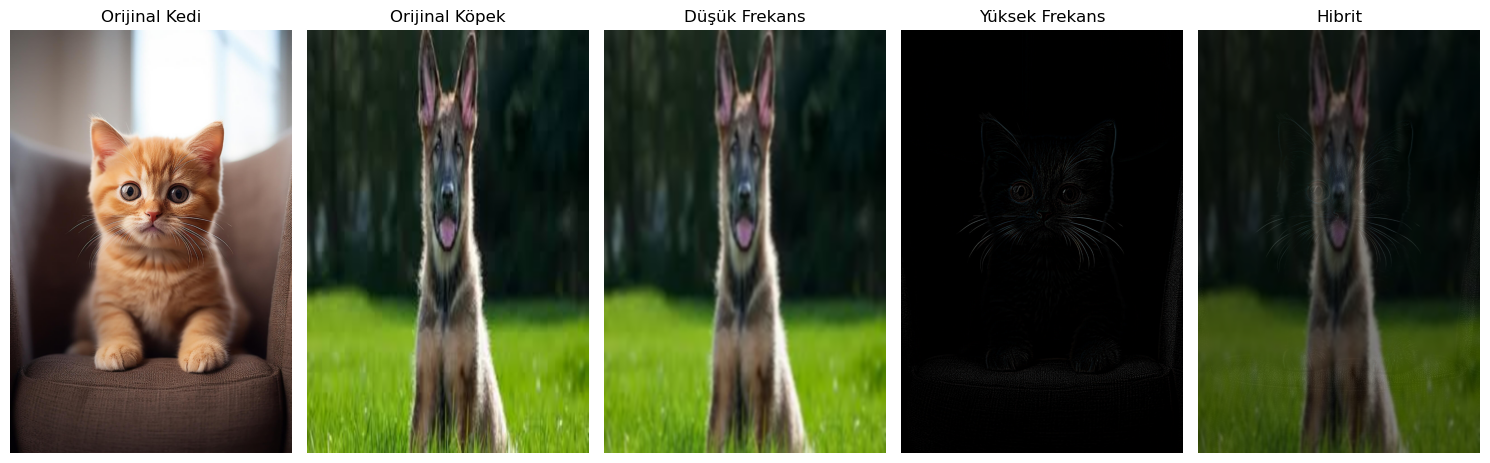

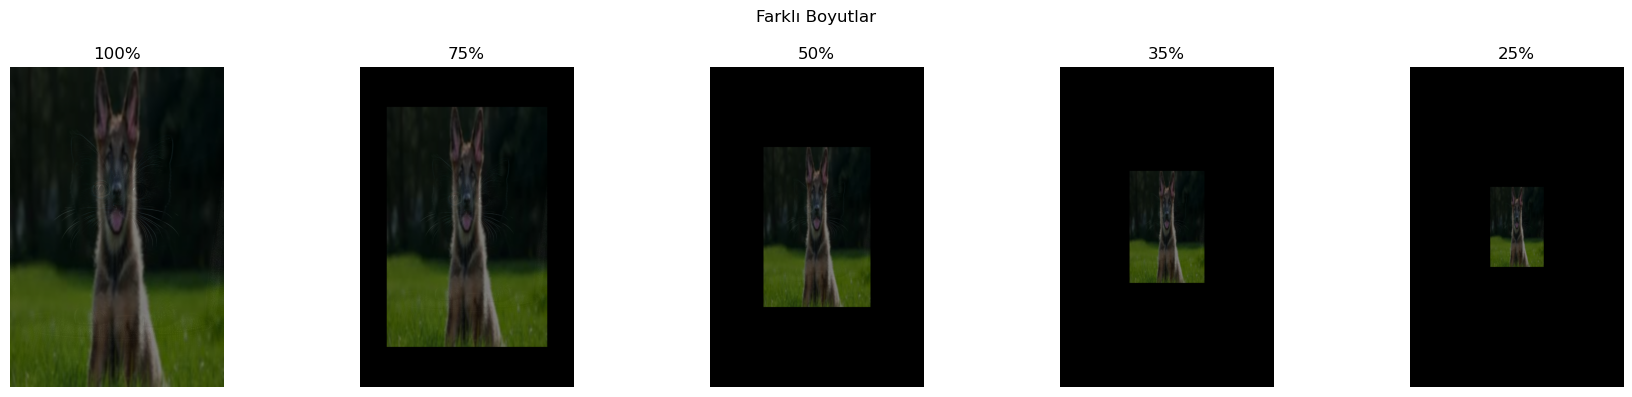

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgKedi = cv2.imread("kedi.jpg")
imgKopek = cv2.imread("kopek.jpg")

if imgKedi is None or imgKopek is None:
    raise ValueError("Görseller yüklenemedi")

if imgKedi.shape != imgKopek.shape:
    imgKopek = cv2.resize(imgKopek, (imgKedi.shape[1], imgKedi.shape[0]))

low_pass = cv2.GaussianBlur(imgKopek, (21, 21), 0)

img1_blur = cv2.GaussianBlur(imgKedi, (21, 21), 0)
high_pass = cv2.subtract(imgKedi, img1_blur)

hibrit = cv2.addWeighted(low_pass, 0.5, high_pass, 0.5, 0)

plt.figure(figsize=(15,10))
baslik = ['Orijinal Kedi', 'Orijinal Köpek', 'Düşük Frekans', 'Yüksek Frekans', 'Hibrit']
images = [imgKedi, imgKopek, low_pass, high_pass, hibrit]

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(baslik[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 4))
for i, zoom in enumerate([1.0, 0.75, 0.5, 0.35, 0.25]):
    height, width = hibrit.shape[:2]
    canvas = np.zeros((height, width, 3), dtype=np.uint8)
    zoomed = cv2.resize(hibrit, (0, 0), fx=zoom, fy=zoom)

    y_offset = (height - zoomed.shape[0]) // 2
    x_offset = (width - zoomed.shape[1]) // 2
    canvas[y_offset:y_offset+zoomed.shape[0], x_offset:x_offset+zoomed.shape[1]] = zoomed

    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))
    plt.title(f"{int(zoom*100)}%")
    plt.axis('off')

plt.suptitle("Farklı Boyutlar")
plt.tight_layout()
plt.show()


# Yeni Bölüm